In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
def initialize(size, stop_time, dx, radius, height):
    '''
    takes the size of the box to be working in and a starting distrubution to create the initial distribution
    '''
    D = 1
    dt = (dx**2)/(4*D)
    grids = int(size/dx)
    dens_array = np.zeros((grids, grids)) 

    center_i = grids // 2 +1
    center_j = grids // 2 +1
    radius_n = int(radius / dx)  # Creates a "circle" for the initial density 

    for i in range(grids):
        for j in range(grids):
            if (i - center_i)**2 + (j - center_j)**2 <= radius_n**2:
                dens_array[i, j] = height  # puts a height on that initial circle

    return stop_time, dens_array, grids, dx, D, dt
        

In [3]:
def diffuse(dens_array, grids, D, dx, dt):

    dens_array_new = np.copy(dens_array)
    for i in range(1, grids-1):
        for j in range(1, grids-1):           
            dens_array_new[i][j] = (
                dens_array[i][j] + (D*dt/(dx**2))*(
                    dens_array[i+1][j]+dens_array[i-1][j]+
                    dens_array[i][j+1]+dens_array[i][j-1]-
                    4*dens_array[i][j]
                )
            )
    return dens_array_new

In [30]:
def animate_diffusion(size=101, stop_time=30.0, dx=1, radius=4, height=7, interval=50):
    stop_time, dens_array, grids, dx, D, dt = initialize(size, stop_time, dx, radius, height)

    fig, ax = plt.subplots()
    img = ax.imshow(dens_array, cmap='hot', origin='lower', vmin=0, vmax=height)
    ax.set_title("Diffusion Over Time")

    frames = int(stop_time / dt)
    history = [dens_array]

    def update(frame):
        new_dens = diffuse(history[-1], grids, D, dx, dt)
        history.append(new_dens)
        img.set_data(new_dens)
        ax.set_title(f"t = {frame * dt:.2f} s")
        return [img]

    ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval, blit=False)
    ani.save('animation.mp4', writer='ffmpeg', fps=30)
    plt.show()


In [24]:
def main(stop_time, dens_array, grids, dx, D):
    t = 0
    dt = (dx**2)/(4*D)
    while t < stop_time:
        dens_array = diffuse( dens_array, grids, D, dx, dt)
        t += dt
    return(dens_array)
    

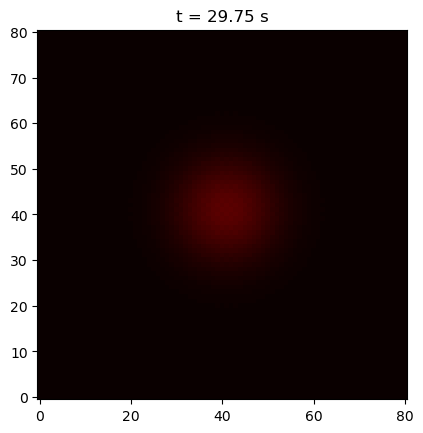

In [31]:
anim = animate_diffusion(size = 81, stop_time = 30, height = 5)


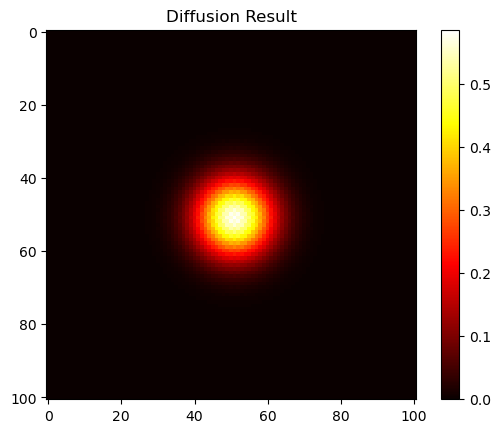

(0.0, 4.0)

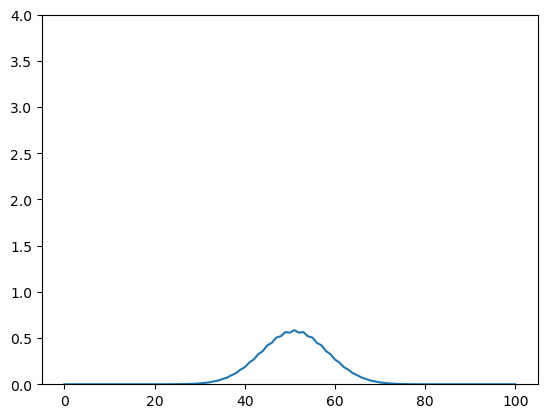

In [39]:
stop_time, dens_array, grids, dx, D, dt = initialize(101, 25, 1, 4, 4)

final_density = main(stop_time, dens_array, grids, dx, D)
plt.imshow(final_density, cmap='hot')
plt.colorbar()
plt.title('Diffusion Result')
plt.show()

x = np.arange(0, grids, dx)
density = []
for i in range(grids):
    density.append(final_density[grids//2 +1][i])
plt.plot(x,density)
plt.ylim(0,4)